### Modeling COCO - QA
* [Review](https://arxiv.org/abs/1610.01465)

### Setup Environment:

In [1]:
import os
import pandas as pd

from src.classifiers import preprocess_data, process_labels,split_data

from src.classifiers import VQADataset
from torch.utils.data import DataLoader

from src.classifiers_cpu_metrics import train_early_fusion, train_late_fusion

In [2]:
PATH = 'Embeddings_vlm/coco-qa/'
FILE = 'embeddings_clip.csv'

FILE_PATH = os.path.join(PATH, FILE)

## Get data

In [3]:
df = pd.read_csv(FILE_PATH)
df.drop(columns=['image_id'], inplace=True)
df.head()

,questions,answers,types,split,image_embedding_0,image_embedding_1,image_embedding_2,image_embedding_3,image_embedding_4,image_embedding_5,...,text_embedding_502,text_embedding_503,text_embedding_504,text_embedding_505,text_embedding_506,text_embedding_507,text_embedding_508,text_embedding_509,text_embedding_510,text_embedding_511
0,what is using umbrellas as a central theme,sculpture,0,train,-0.002133,0.026865,-0.009941,-0.000407,-0.001535,0.043021,...,0.013656,0.006139,0.018542,-0.027902,-0.010581,0.001189,-0.018054,0.006616,0.039209,-0.052176
1,what walks toward the rope perimeter fence,elephant,0,train,-0.037488,-0.025273,0.021552,0.056967,0.010018,-0.042177,...,-0.007028,-0.002520,0.001875,-0.028708,0.016469,-0.011620,-0.010105,0.034845,-0.021513,0.029620
2,what is the color of the horses,brown,2,train,-0.050188,0.034539,0.008536,0.017248,0.027789,-0.020876,...,0.009025,0.000571,-0.022466,0.010579,-0.025592,0.034800,-0.007262,0.010370,-0.009308,0.008854
3,where is the black cat laying down,sink,3,train,-0.003502,0.007140,0.014187,0.052844,0.012376,-0.005956,...,-0.012388,0.034164,0.007408,0.029274,-0.018850,-0.007775,0.033192,0.001180,-0.041182,0.004494
4,what is the color of the character,purple,2,train,0.046207,0.050791,-0.010908,0.025887,-0.029377,-0.023032,...,-0.009319,-0.034246,0.002291,-0.004910,-0.025292,0.012616,-0.017789,-0.012675,-0.004709,0.028756


## Data Perparation

In [4]:
# Split the data
train_df, test_df = split_data(df)

# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column] #[f'text_{i}']
image_columns = [column for column in df.columns if 'image' in column] #[f'image_{i}']
label_columns = 'answers'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

Train Shape: (78736, 1028)
Test Shape: (38948, 1028)


### Models

In [5]:
text_input_size = len(text_columns)
image_input_size = len(image_columns)
output_size = len(mlb.classes_)
multilabel = False

Training Early Fusion Model:
Model Memory Usage: 0.71 MB
The number of parameters of the model are: 186926


STAGE:2024-02-10 22:42:57 52918:52918 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/20 - Test Accuracy: 0.3955, macro-f1: 0.2378
Epoch 1/20 - Training Time: 7.47 seconds | Inference Time: 4.92 seconds
Epoch 2/20 - Test Accuracy: 0.4276, macro-f1: 0.2778
Epoch 2/20 - Training Time: 6.00 seconds | Inference Time: 4.75 seconds
Epoch 3/20 - Test Accuracy: 0.4252, macro-f1: 0.2935
Epoch 3/20 - Training Time: 6.73 seconds | Inference Time: 4.84 seconds
Epoch 4/20 - Test Accuracy: 0.4206, macro-f1: 0.2942
Epoch 4/20 - Training Time: 7.06 seconds | Inference Time: 4.92 seconds
Epoch 5/20 - Test Accuracy: 0.4376, macro-f1: 0.3027
Epoch 5/20 - Training Time: 7.83 seconds | Inference Time: 5.12 seconds
Epoch 6/20 - Test Accuracy: 0.4372, macro-f1: 0.3020
Epoch 6/20 - Training Time: 7.39 seconds | Inference Time: 5.22 seconds
Epoch 7/20 - Test Accuracy: 0.4403, macro-f1: 0.3071
Epoch 7/20 - Training Time: 7.54 seconds | Inference Time: 5.18 seconds
Epoch 8/20 - Test Accuracy: 0.4559, macro-f1: 0.3110
Epoch 8/20 - Training Time: 7.57 seconds | Inference Time: 5.20 seconds


STAGE:2024-02-10 22:47:35 52918:52918 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-10 22:47:36 52918:52918 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch         8.05%       14.895s        59.16%      109.479s       4.447ms      -8.53 Gb     -11.37 Gb         24620  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        32.55%       60.245s        33.10%       61.262s       1.663ms      12.74 Gb      12.73 Gb         36840  
                                   DataParallel.forward         2.82%        5.225s        20.57%       38.069s       1.034ms      12.80 Gb      -5.04

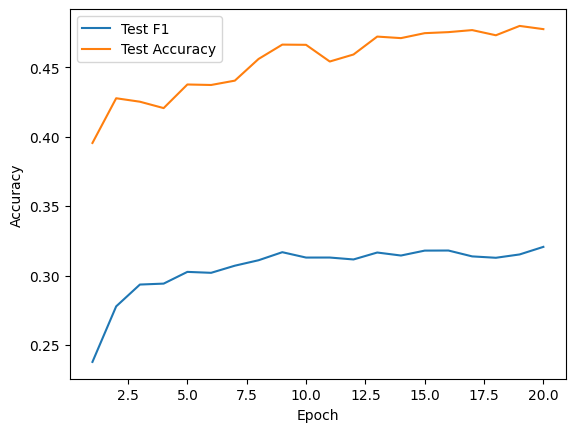

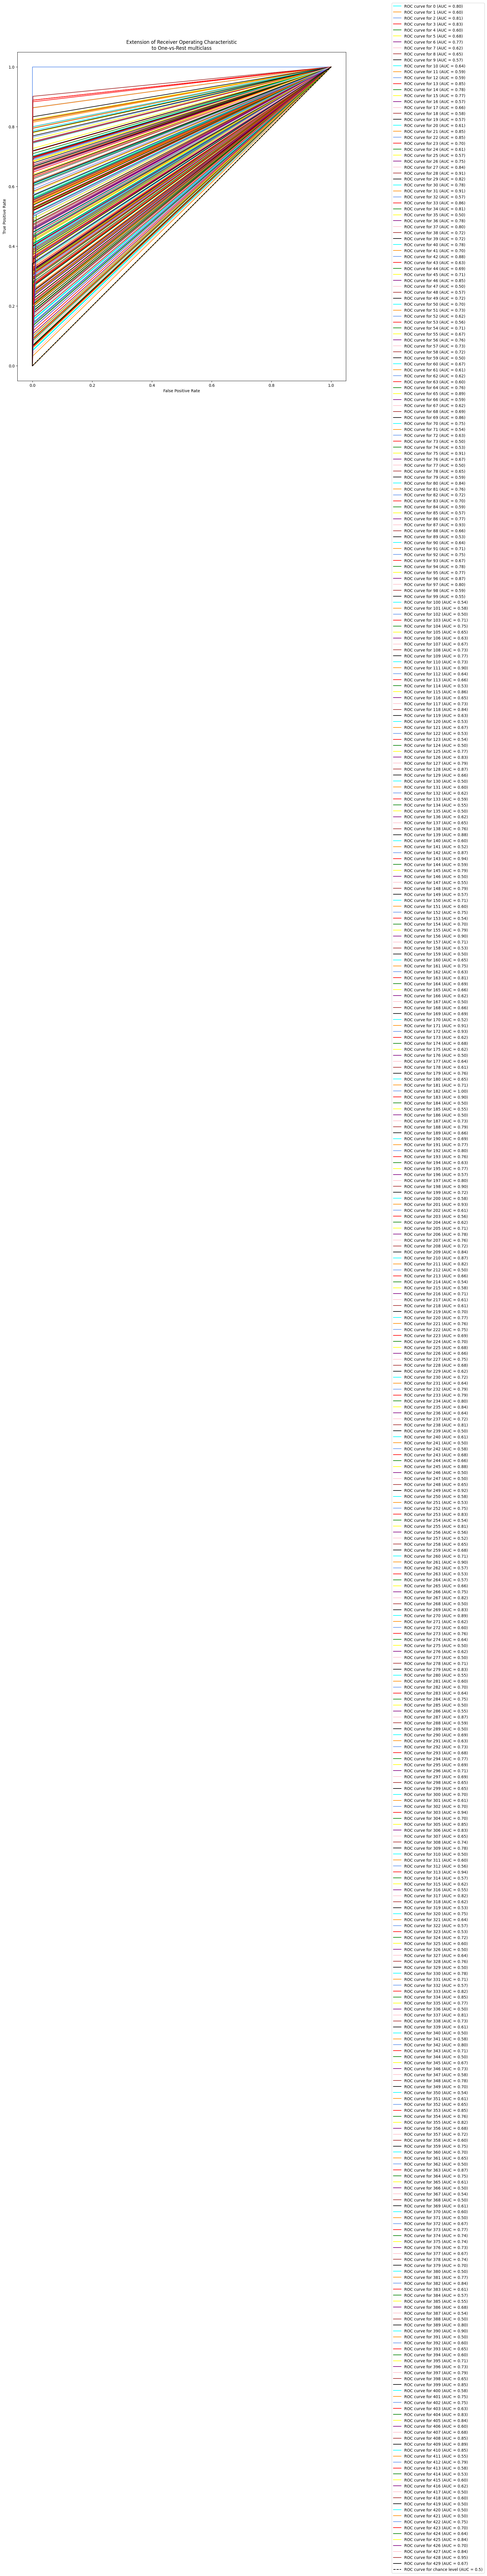

              precision    recall  f1-score   support

           0       0.09      0.61      0.15        41
           1       0.72      0.20      0.32       439
           2       0.68      0.63      0.65       163
           3       0.43      0.66      0.52        32
           4       0.09      0.20      0.13        15
           5       0.43      0.35      0.39        34
           6       0.47      0.55      0.51        31
           7       0.11      0.25      0.15        12
           8       0.19      0.30      0.23        10
           9       0.25      0.14      0.18        21
          10       0.30      0.27      0.29        11
          11       0.12      0.17      0.14        52
          12       0.08      0.17      0.11        29
          13       0.80      0.70      0.75       309
          14       0.58      0.57      0.57       116
          15       0.62      0.55      0.58        97
          16       0.03      0.14      0.05         7
          17       0.32    

In [6]:
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=20, multilabel=multilabel, report=True, p=0.2)

Training Late Fusion Model:
Model Memory Usage: 0.46 MB
The number of parameters of the model are: 121390


STAGE:2024-02-10 23:06:51 52918:52918 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/20 - Test Accuracy: 0.4138, macro-f1: 0.2331
Epoch 1/20 - Training Time: 10.34 seconds | Inference Time: 6.61 seconds
Epoch 2/20 - Test Accuracy: 0.4220, macro-f1: 0.2670
Epoch 2/20 - Training Time: 9.86 seconds | Inference Time: 6.63 seconds
Epoch 3/20 - Test Accuracy: 0.4352, macro-f1: 0.2843
Epoch 3/20 - Training Time: 10.67 seconds | Inference Time: 6.90 seconds
Epoch 4/20 - Test Accuracy: 0.4414, macro-f1: 0.2966
Epoch 4/20 - Training Time: 11.07 seconds | Inference Time: 6.57 seconds
Epoch 5/20 - Test Accuracy: 0.4445, macro-f1: 0.3035
Epoch 5/20 - Training Time: 11.08 seconds | Inference Time: 6.88 seconds
Epoch 6/20 - Test Accuracy: 0.4452, macro-f1: 0.3011
Epoch 6/20 - Training Time: 12.37 seconds | Inference Time: 6.69 seconds
Epoch 7/20 - Test Accuracy: 0.4529, macro-f1: 0.3034
Epoch 7/20 - Training Time: 12.61 seconds | Inference Time: 6.71 seconds
Epoch 8/20 - Test Accuracy: 0.4516, macro-f1: 0.3068
Epoch 8/20 - Training Time: 12.36 seconds | Inference Time: 6.83 s

STAGE:2024-02-10 23:13:21 52918:52918 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-10 23:13:23 52918:52918 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch         8.54%       21.269s        73.51%      183.138s       4.977ms     -10.25 Gb     -15.65 Gb         36800  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        26.03%       64.845s        26.44%       65.861s       1.788ms      12.74 Gb      12.73 Gb         36840  
                              Optimizer.step#AdamW.step         5.72%       14.257s        25.01%       62.296s       2.530ms     948.40 Kb     -21.78

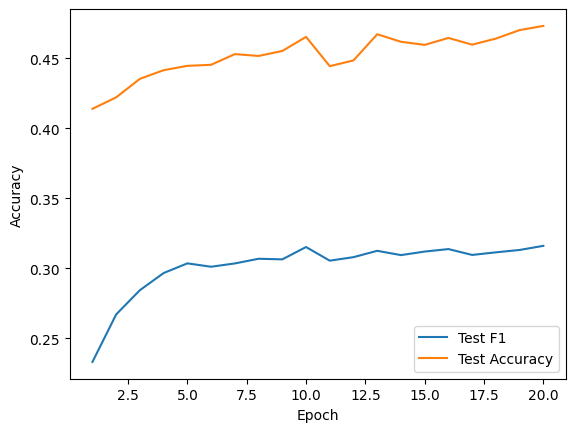

In [ ]:
# Train late fusion model
print("Training Late Fusion Model:")
train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=20, multilabel=multilabel, report=True, p=0.2)